In [63]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_curve, roc_auc_score,log_loss,classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, LogisticRegression, LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [65]:
cancer = pd.read_csv("BreastCancer.csv",index_col=0)

In [67]:
cancer.columns

Index(['Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith', 'BareN',
       'BChromatin', 'NoemN', 'Mitoses', 'Class'],
      dtype='object')

In [69]:
X = cancer.drop('Class',axis = 1)
y = cancer['Class']

In [71]:
scaler = StandardScaler().set_output(transform='pandas')
X_scl = scaler.fit_transform(X)

In [73]:
X_scl

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses
Code,,,,,,,,,
61634,0.206936,0.283845,-0.069850,-0.633247,-0.549561,-0.425655,-0.590067,0.043601,-0.343912
63375,1.628538,-0.699995,-0.406574,1.119088,0.354305,1.794739,1.461957,1.354454,0.239570
76389,1.983939,0.283845,1.277048,-0.282780,-0.549561,1.239641,1.051552,-0.611825,-0.343912
95719,0.562336,2.251526,2.287222,2.520955,2.162039,1.794739,1.461957,2.337594,3.156977
128059,-1.214667,-0.699995,-0.743299,-0.633247,-0.549561,0.406993,0.641147,-0.611825,-0.343912
...,...,...,...,...,...,...,...,...,...
1369821,1.983939,2.251526,2.287222,2.520955,0.806239,1.794739,2.693171,2.337594,3.156977
1371026,0.206936,2.251526,2.287222,2.520955,0.354305,1.794739,0.641147,1.026741,0.823051
1371920,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.703204,-0.179662,-0.284112,-0.343912


In [75]:
prcomp = PCA().set_output(transform='pandas')

In [77]:
X_pca = prcomp.fit_transform(X_scl)

In [79]:
X_pca

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
Code,,,,,,,,,
61634,-0.661561,-0.168216,-0.583962,0.439347,-0.230526,0.130653,-0.097528,-0.541727,0.328081
63375,2.178759,-0.693348,-0.432389,-1.192376,-1.074153,-0.442691,-0.702441,1.787781,-0.244667
76389,1.404956,-1.364750,-1.761714,-0.878367,0.013219,-0.517801,0.835375,-0.408381,-0.565653
95719,6.073098,1.994961,1.081435,-0.237234,-0.141189,0.019790,-0.355352,-0.444035,-0.062628
128059,-1.237518,-0.370332,0.823064,-0.473932,-0.127604,-1.151372,0.508269,0.344131,0.029906
...,...,...,...,...,...,...,...,...,...
1369821,6.473443,1.285709,-0.048059,-0.936819,-1.446932,0.152226,0.731058,-0.235807,-0.042668
1371026,4.097345,-0.215083,1.078721,-0.912918,0.027151,0.599090,-0.276698,-1.705969,0.099999
1371920,-1.351669,-0.095164,-0.536224,0.120275,-0.359013,0.101649,0.178219,0.452815,0.002252


In [81]:
prcomp.components_

array([[ 0.3026103 ,  0.38120509,  0.37768235,  0.33272243,  0.3362519 ,
         0.3336643 ,  0.34603577,  0.33602504,  0.22958816],
       [-0.14216061, -0.0485367 , -0.0849296 , -0.04409829,  0.16558909,
        -0.25303695, -0.22957052,  0.0241358 ,  0.90749339],
       [-0.8629704 ,  0.01443178, -0.03851777,  0.42587557,  0.10521945,
         0.01189156,  0.19489993,  0.12416458, -0.08720566],
       [-0.10670941,  0.20339625,  0.17207221, -0.46640884,  0.39463013,
        -0.53218824, -0.0104344 ,  0.44705783, -0.24732605],
       [-0.06214172,  0.13680009,  0.10399012, -0.0114335 ,  0.66974304,
         0.12253974, -0.25126738, -0.65077411, -0.12753628],
       [ 0.27250308,  0.09762242,  0.01814735,  0.67857344, -0.04235109,
        -0.60585095, -0.25371241, -0.0464848 , -0.14156586],
       [-0.01408445,  0.19920448,  0.12433121, -0.12398687, -0.17607418,
        -0.38528134,  0.70475995, -0.48607138,  0.1299708 ],
       [ 0.23193178, -0.45060973, -0.59052487,  0.10130115,  0

In [83]:
prcomp.explained_variance_ratio_ * 100

array([65.45437483,  8.62625123,  5.98724547,  5.13612665,  4.21920122,
        3.39206535,  3.28441735,  2.91485025,  0.98546764])

In [85]:
X.columns

Index(['Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith', 'BareN',
       'BChromatin', 'NoemN', 'Mitoses'],
      dtype='object')

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

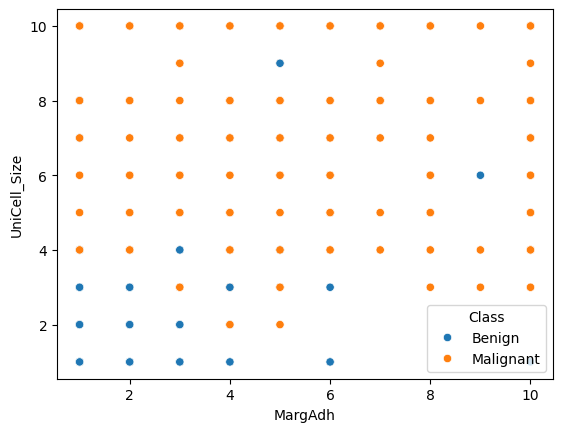

In [89]:
sns.scatterplot(x = 'MargAdh', y= 'UniCell_Size',hue = 'Class', data = cancer)
plt.show()

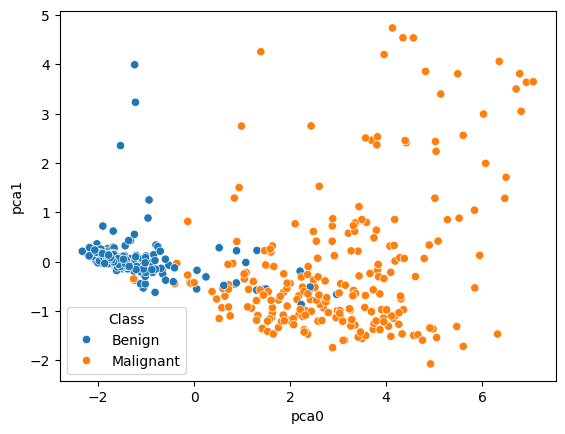

In [91]:
df_pca = X_pca.copy()
df_pca['Class'] = cancer['Class']
sns.scatterplot(x='pca0', y='pca1', hue='Class', data = df_pca )
plt.show()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 24, test_size = 0.3,stratify = y)



In [126]:
lr = LogisticRegression(random_state = 24)
prcomp = PCA().set_output(transform='pandas')
pipe_pca = Pipeline([('SCL',scaler),('PCA',prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)


In [128]:
X_trn_pca

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
Code,,,,,,,,,
1266124,-1.618683,-0.063458,-0.801842,-0.041840,-0.037496,-0.162797,0.297126,-0.112823,-0.171662
128059,-1.241737,-0.179491,1.030087,-0.479426,0.155588,0.391829,-1.049036,0.371874,0.026342
837082,-1.786005,0.154111,0.344232,0.081593,0.012899,0.319730,-0.164953,0.186703,-0.008101
1197510,-1.461329,-0.118005,-0.562148,-0.102333,-0.185095,0.337380,0.022154,0.452959,0.008290
1180831,-1.671900,0.191127,-0.062686,0.154662,0.304829,-0.065346,0.094313,0.289169,-0.011360
...,...,...,...,...,...,...,...,...,...
1049837,-2.180049,0.346074,0.429930,0.138936,0.182284,-0.239815,0.048149,-0.272396,0.032942
763235,-1.676807,0.638175,-0.151903,-0.180249,-0.045818,0.101640,-0.030438,0.032090,0.000601
1184840,-1.688542,0.121262,0.533441,0.113263,0.264033,0.025067,-0.227144,-0.502198,-0.421625


In [130]:
lr.fit(X_trn_pca.iloc[:,:6],y_train)


LogisticRegression(random_state=24)

In [132]:
X_tst_pca = pipe_pca.transform(X_test)

with 5 columns

In [134]:
y_pred = lr.predict(X_tst_pca.iloc[:,:6])
print(accuracy_score(y_test,y_pred))

0.9761904761904762


In [158]:
# 4 columns
lr.fit(X_trn_pca.iloc[:,:4],y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:4])
print(accuracy_score(y_test,y_pred))

0.9714285714285714


In [138]:
lr.fit(X_trn_pca.iloc[:,:3],y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:3])
print(accuracy_score(y_test,y_pred))

0.9619047619047619


In [140]:
lr.fit(X_trn_pca.iloc[:,:1],y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:1])
print(accuracy_score(y_test,y_pred))

0.9714285714285714


In [144]:
lr.fit(X_trn_pca.iloc[:,:7],y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:7])
print(accuracy_score(y_test,y_pred))

0.9714285714285714


PCA + LR + Scaler 

In [150]:

scaler = StandardScaler().set_output(transform='pandas')
lr = LogisticRegression(random_state = 24)
prcomp = PCA(n_components = 5).set_output(transform='pandas')

pipe_pca = Pipeline([('SCL',scaler),('PCA',prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca,y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca)
print(accuracy_score(y_test,y_pred))

0.9761904761904762
